In [10]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [11]:
def normalizar(images):
    return images / 255.0

In [12]:
# Paso 1: Cargar y preprocesar los datos de Fashion MNIST
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

#Normalizo las imagenes 
train_images = normalizar(train_images)
test_images = normalizar(test_images)

In [13]:
# Definimos el generador de datos con aumento
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,      # Rotar las imágenes hasta 20 grados
    width_shift_range=0.2,  # Desplazar las imágenes horizontalmente hasta un 20% del ancho
    height_shift_range=0.2, # Desplazar las imágenes verticalmente hasta un 20% de la altura
    shear_range=0.2,        # Aplicar transformaciones de corte
    zoom_range=0.2,         # Aplicar zoom hasta un 20%
    horizontal_flip=True,   # Invertir las imágenes horizontalmente
    fill_mode='nearest'     # Método para llenar los píxeles generados
)

In [14]:
#Crear el modelo de la CNN
model= tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3),strides=(1,1), padding='same' ,activation='relu', input_shape=(28, 28, 1)),
    #same : sin relleno same: Padding para mantener dimensionalidad
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(1,1), padding='same'),
    #Aumento filtros para aprovechar la capacidad de la red de aprender mejores caracteristicas
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), strides=(1,1), padding='same' , activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(1,1), padding='same'),
    #En cada epoca la % de que las neuronas 
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), strides=(1,1), padding='same' , activation='relu'),
    #Aplana la entrada (vector unidimensional)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    #Numero de clases capa de salida
    tf.keras.layers.Dense(10, activation='softmax')
])

d:\IAProyectos\ProyectoFinal_IA\env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<h2>Compilar el modelo</h2>

In [15]:
"""
SGD (Stochastic Gradient Descent): Un optimizador básico que actualiza los pesos utilizando la regla del gradiente descendente.
Adam (Adaptive Moment Estimation): Un optimizador avanzado que ajusta las tasas de aprendizaje para cada parámetro.
"""
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

<h2>Entrenar el modelo</h2>

In [16]:
# Reajustar las dimensiones de los datos de entrenamiento y prueba
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Modelo con aumento de datos
history = model.fit(datagen.flow(train_images, train_labels, batch_size=32), 
                    epochs=100, 
                    validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 45ms/step - accuracy: 0.6081 - loss: 1.0467 - val_accuracy: 0.8000 - val_loss: 0.5655
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 45ms/step - accuracy: 0.7649 - loss: 0.6273 - val_accuracy: 0.8274 - val_loss: 0.4738
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 45ms/step - accuracy: 0.7954 - loss: 0.5526 - val_accuracy: 0.8238 - val_loss: 0.4792
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 45ms/step - accuracy: 0.8083 - loss: 0.5182 - val_accuracy: 0.8498 - val_loss: 0.4067
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 45ms/step - accuracy: 0.8134 - loss: 0.4996 - val_accuracy: 0.8599 - val_loss: 0.3874
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 45ms/step - accuracy: 0.8232 - loss: 0.4728 - val_accuracy: 0.8626 - val_loss: 0.3781
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 45ms/step - accuracy: 0.8311 - loss: 0.4631 - val_accuracy: 0.8374 - val_loss: 0.4348
Epoch 8/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 45ms/step - accuracy: 

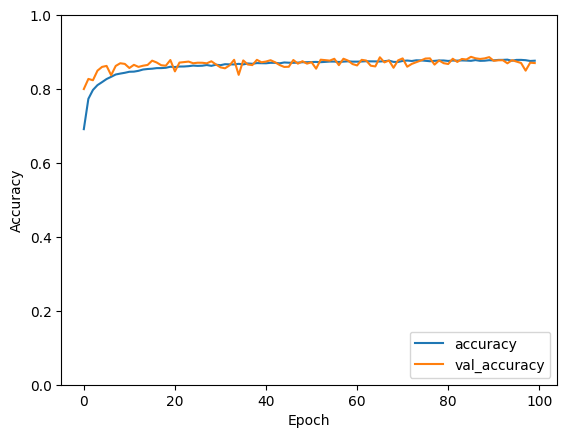

In [17]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


In [18]:
# model.save('proyectoFinal/model/mnist_model.h5')
model.save('D:/IAProyectos/ProyectoFinal_IA/models/mnist_model_mejorado.h5')